# Actividad 4.1 - Redes neuronales artificiales

Construcción y entrenamiento de un modelo de red neuronal par la predicción de precios de casas utilizando el conjunto de datos de Boston_House_Prices.

## Analísis de datos

### Carga de datos

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [5]:
data = pd.DataFrame(boston.data)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Asigando precio y nombre de columnas

In [7]:
data.columns = boston.feature_names

In [17]:
data['PRICE'] = boston.target

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
print(data.shape)

(506, 14)


Corroborando si existen valores nulos

In [20]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Estadisticas descriptivas

In [21]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Observando la distribución de los precios

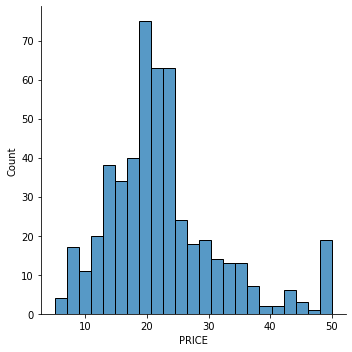

In [26]:
import seaborn as sns
sns.displot(data=data.PRICE)

<AxesSubplot:>

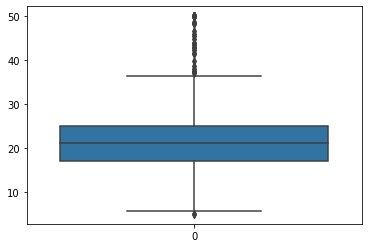

In [27]:
sns.boxplot(data=data.PRICE)

Calculando los coefficientes de correlación

In [28]:
correlation = data.corr()

In [29]:
correlation.loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

In [31]:
import matplotlib.pyplot as plt

<AxesSubplot:>

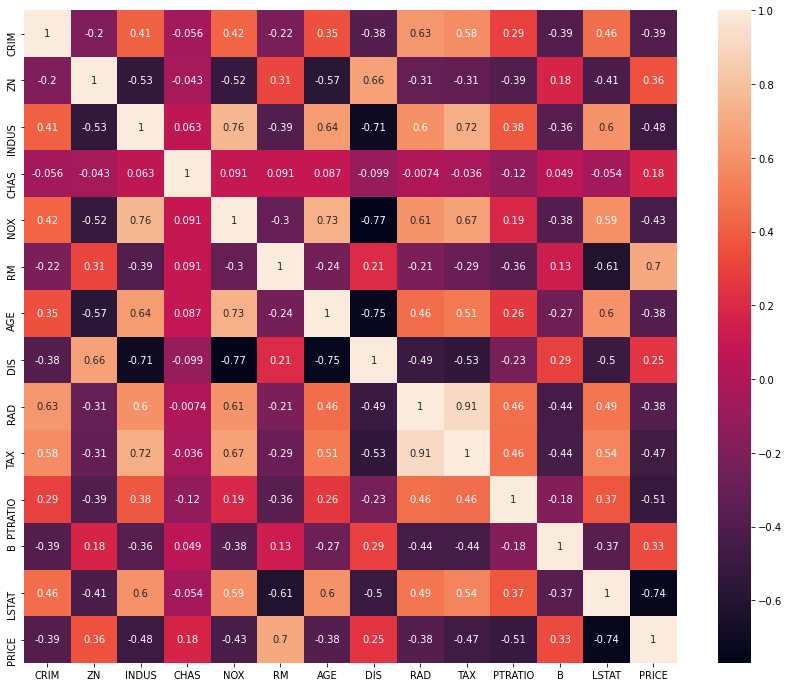

In [33]:
fig, axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation, square=True, annot=True)

Observando las variables más llamativas obtenidas del analísis de correlación

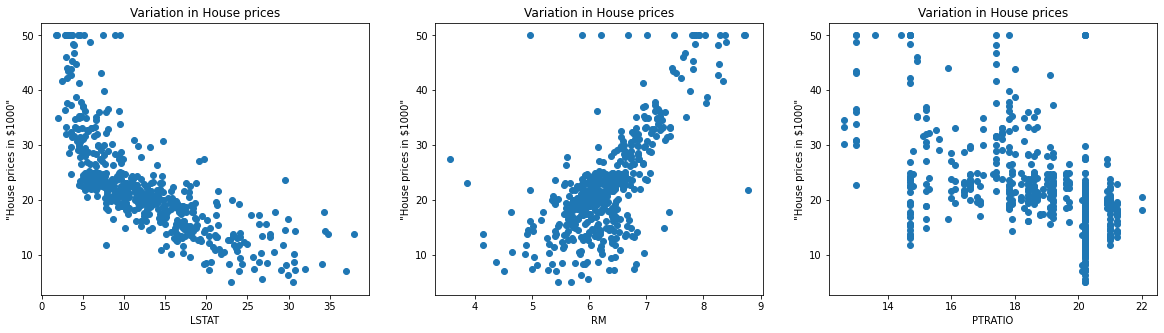

In [34]:
plt.figure(figsize=(20,5))
features = ['LSTAT', 'RM', 'PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = data.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

### Preparando los datos para el entrenamiento

In [36]:
X = data.iloc[:,:-1]

In [39]:
y = data.PRICE

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
X_train = sc.fit_transform(X_train)

In [45]:
X_test = sc.transform(X_test)

### Construcción del modelo de red neuronal

In [50]:
import keras
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

In [51]:
model = Sequential()

Definiendo la arquitectura de la red neuronal

In [53]:
model.add(Dense(128, activation='relu', input_dim = 13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

Entrenando la red neuronal

In [54]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 15s 2ms/step - loss: 586.9261
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 504.9662
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 329.5313
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 114.0957
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 55.6977
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 26.8154
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 17.7073
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 21.5348
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 16.5987
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 13.6926
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 11.2430
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 10.3592
Epoch 13/100
13/13 [

### Evaluando los resultados

In [55]:
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2 = r2_score(y_test, y_pred)

In [58]:
print(r2)

0.9051913696866637


In [59]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

2.9676084866841217
